In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)
import matplotlib.pyplot as plt
import progressbar
import scipy

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py,progressbar,scipy

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

pandas     : 1.2.0
keras      : 2.4.3
numpy      : 1.19.5
math       : unknown
tensorflow : 2.4.0
matplotlib : 3.3.3
h5py       : 2.10.0
progressbar: 2.5
scipy      : 1.6.0

Compiler    : GCC 5.4.0 20160609
OS          : Linux
Release     : 5.8.0-41-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Mon Feb 01 2021 19:07:32CET



## Load of the data

In [29]:
from process import loaddata
class_data1 = loaddata("../data/spec/raw_data_spec200.csv")
class_data2 = loaddata("../data/spec/raw_data_spec1.csv")

In [36]:
class_data = np.concatenate((class_data1,class_data2))

In [37]:
class_data.shape

(118458, 12)

In [38]:
np.random.shuffle(class_data)
y = class_data[:,-3:]
x = class_data[:,:-3]

In [39]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 88843 
Valuation sample: 29615


In [40]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [41]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers
from keras import regularizers

In [114]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (9, kernel_initializer= "normal" , input_shape = x.shape))
    model.add (layers.Dense (12, activation = "relu"))
    model.add (layers.Dense (32, activation = "relu"))
    model.add (layers.Dense (64, activation = "relu"))
    model.add (layers.Dense (128, activation = "relu"))
    model.add (layers.Dense (128, activation = "relu"))
    model.add (layers.Dense (64, activation = "relu"))
    model.add (layers.Dense (32, activation = "relu"))
    model.add (layers.Dense (12, activation = "relu"))
    model.add (layers.Dense (9, activation = "relu"))
    model.add (layers.Dense (3))
    model.compile(optimizer = "rmsprop" , loss = "mse" , metrics =["mape"])
    return model

In [115]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 50, batch_size = 1050, validation_data = (x_val, y_val) )
model.save("../models/spec/firstNN.h5")

Epoch 1/50
85/85 [==============================] - 4s 19ms/step - loss: 22.6499 - mape: 239.0288 - val_loss: 4.1617 - val_mape: 7997.6191
Epoch 2/50
85/85 [==============================] - 1s 12ms/step - loss: 2.3695 - mape: 222.4344 - val_loss: 1.1018 - val_mape: 5175.9224
Epoch 3/50
85/85 [==============================] - 1s 14ms/step - loss: 1.1457 - mape: 171.9843 - val_loss: 0.7062 - val_mape: 4817.3936
Epoch 4/50
85/85 [==============================] - 1s 16ms/step - loss: 0.8043 - mape: 91.9153 - val_loss: 0.7737 - val_mape: 1469.8298
Epoch 5/50
85/85 [==============================] - 1s 15ms/step - loss: 0.5994 - mape: 75.5256 - val_loss: 0.4007 - val_mape: 4451.2949
Epoch 6/50
85/85 [==============================] - 1s 13ms/step - loss: 0.5524 - mape: 97.6281 - val_loss: 0.4635 - val_mape: 1566.8085
Epoch 7/50
85/85 [==============================] - 1s 14ms/step - loss: 0.5184 - mape: 77.9410 - val_loss: 0.4222 - val_mape: 185.0104
Epoch 8/50
85/85 [====================

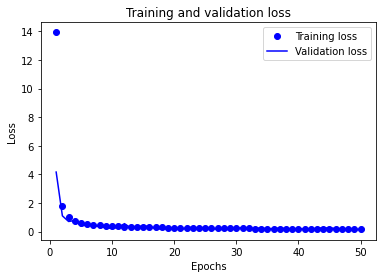

In [116]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Test spectrum

In [117]:
from tensorflow import keras
model = keras.models.load_model('../models/spec/firstNN.h5')

In [118]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 118458, 9)         90        
_________________________________________________________________
dense_77 (Dense)             (None, 118458, 12)        120       
_________________________________________________________________
dense_78 (Dense)             (None, 118458, 32)        416       
_________________________________________________________________
dense_79 (Dense)             (None, 118458, 64)        2112      
_________________________________________________________________
dense_80 (Dense)             (None, 118458, 128)       8320      
_________________________________________________________________
dense_81 (Dense)             (None, 118458, 128)       16512     
_________________________________________________________________
dense_82 (Dense)             (None, 118458, 64)       

In [119]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins, histtype=u'step', density=True)
    plt.yscale("log")
    plt.show()

In [120]:
from tensorflow import keras 
prediction = model.predict(x_train)

[-0.96604633 -6.5259113  10.411156   ...  2.1756992   3.9090858
 -1.5734965 ]
[ -0.8408875   -6.19493389  11.63083363 ...   6.89014522 -14.12259865
  -2.94316721]


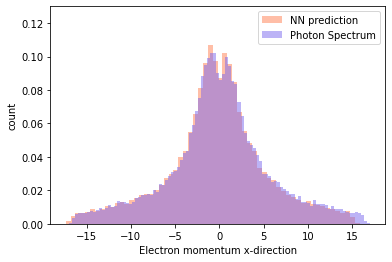

In [121]:
p1e_nn = prediction[:,0] 
p1e = y[:,0]
print(p1e_nn)
print(p1e)
plt.hist(p1e_nn, 60, alpha=0.5,  color = 'coral', label='NN prediction', density = True)
plt.hist(p1e, 100, alpha=0.5, color = 'mediumslateblue', label='Photon Spectrum', density = True)
plt.xlabel('Electron momentum x-direction')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.ylim((0, 0.130))
plt.show()

[  4.408074     5.5861998  -13.578919   ...   9.584326    -5.433268
   0.83062935]
[  4.32377971   5.46025696 -14.23323441 ...  -0.87746776  -5.31298351
  10.03891563]


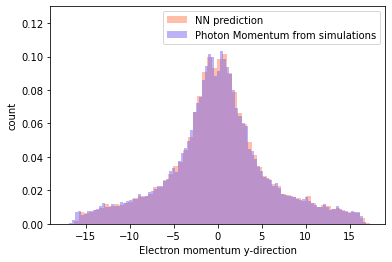

In [122]:
p2e_nn = prediction[:,1] 
p2e = y[:,1]
print(p2e_nn)
print(p2e)
plt.hist(p2e_nn, 60, alpha=0.5,  color = 'coral', label='NN prediction', density = True)
plt.hist(p2e, 100, alpha=0.5, color = 'mediumslateblue', label='Photon Momentum from simulations', density = True)
plt.xlabel('Electron momentum y-direction')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.ylim((0, 0.130))
plt.show()

[-0.9770323  6.9427776  2.5675056 ...  7.862105  -2.7960556  1.0661675]
[ -0.94747099   7.53697277   3.49473047 ...   0.60613866  10.08163166
 -11.29436493]


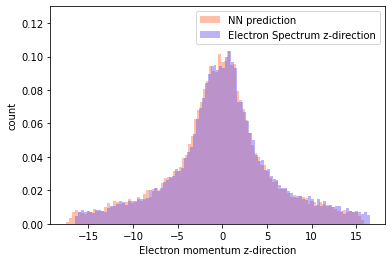

In [123]:
p3e_nn = prediction[:,2] 
p3e = y[:,2]
print(p3e_nn)
print(p3e)
plt.hist(p3e_nn, 100, alpha=0.5,  color = 'coral', label='NN prediction', density = True)
plt.hist(p3e, 100, alpha=0.5, color = 'mediumslateblue', label='Electron Spectrum z-direction', density = True)
plt.xlabel('Electron momentum z-direction')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.ylim((0, 0.130))
plt.show()

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


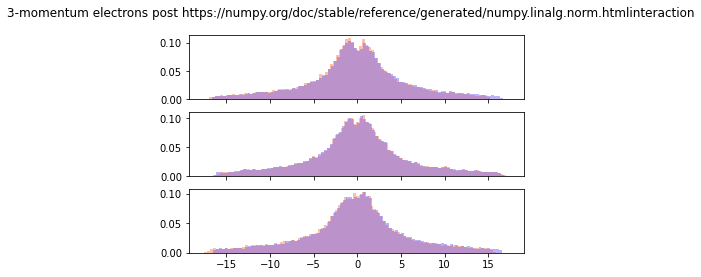

In [124]:
fig, axs = plt.subplots(3, sharex = True)
fig.suptitle('3-momentum electrons post https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.htmlinteraction')
axs[0].hist(p1e_nn, 100, alpha=0.5, color = 'coral', label='NN prediction', density = True)
axs[0].hist(p1e, 100, alpha=0.5, color = 'mediumslateblue', label='NN prediction', density = True)
axs[1].hist(p2e_nn, 100, alpha=0.5, color = 'coral', label='Electron Momentum from simulations', density = True)
axs[1].hist(p2e, 100, alpha=0.5, color = 'mediumslateblue', label='Electron Momentum from simulations', density = True)
axs[2].hist(p3e_nn, 100, alpha=0.5, color = 'coral', label='Electron Momentum from simulations', density = True)
axs[2].hist(p3e, 100, alpha=0.5, color = 'mediumslateblue', label='Electron Momentum from simulations', density = True)
fig.show()

In [125]:
final_e = []
for classi_ in class_data:
    final_e.append(np.linalg.norm(classi_[:-3]))

In [126]:
prediction.shape

(88843, 3)

In [127]:
from tensorflow import keras 
final_e_nn = []
threshold = 0.5
num = int(1*len(x))
bar = progressbar.ProgressBar(maxval=num, 
                              widgets=[progressbar.Bar('=', '[', ']'), ' ', 
                                       progressbar.Percentage(), 
                                       " of {0}".format(num)])
bar.start()
for pred in prediction:
    final_e_nn.append(np.linalg.norm(pred))
bar.finish()

[==============================================================] 100% of 118458


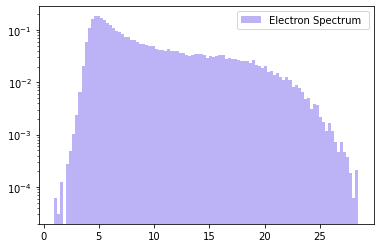

In [128]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

mean,std=norm.fit(final_e)
plt.hist(final_e, bins=100, alpha = 0.5, color = 'mediumslateblue', label='Electron Spectrum ', density = True)
plt.legend(loc='upper right')
plt.yscale('log')
plt.show()

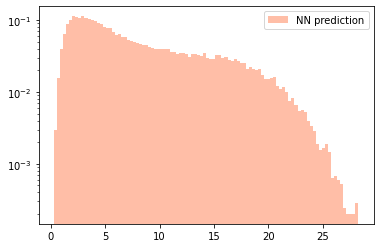

In [129]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

mean_nn,std_nn=norm.fit(final_e_nn)
plt.hist(final_e_nn, bins=100, alpha = 0.5, color = 'coral', label='NN prediction', density = True)
plt.legend(loc='upper right')
plt.yscale('log')
plt.show()

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  """


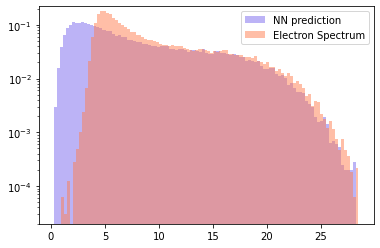

In [130]:
plt.hist(final_e_nn, bins=100, alpha = 0.5, color = 'mediumslateblue', label='NN prediction', density = True)
plt.hist(final_e, bins=100, alpha = 0.5, color = 'coral', label='Electron Spectrum', density = True)
plt.legend(loc = 'upper right')
plt.yscale('log')
plt.ylim((0, 0.22))
plt.show()